In [1]:
print('start')

start


In [2]:
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import math,random
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os

In [3]:
IMG_SIZE = 224
BATCH = 64
root_dir =r'C:\Users\Aneesh Kulkarni\web_dev\flask projects\web page for yolo\cataloguer'
input_dir =r'C:\Users\Aneesh Kulkarni\web_dev\flask projects\web page for yolo\static\input\target'

In [4]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3),pooling='max')

In [5]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(root_dir,
                                        target_size=(IMG_SIZE, IMG_SIZE),
                                        batch_size=BATCH,
                                        class_mode=None,
                                        shuffle=False)


Found 30607 images belonging to 257 classes.


In [6]:
# img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# datagen = img_gen.flow_from_directory(root_dir,
#                                         target_size=(IMG_SIZE, IMG_SIZE),
#                                         batch_size=BATCH,
#                                         class_mode=None,
#                                         shuffle=False)

# num_images = len(datagen.filenames)
# num_epochs = int(math.ceil(num_images / BATCH))

# feature_list = model.predict_generator(datagen, num_epochs, verbose=1)
# print(feature_list)

In [7]:
# file=open('feature_list.csv')
# feature_list=np.loadtxt(file,delimiter=',')
# print(feature_list)
# file.close()

[[ 0.61710203  0.79915404 12.44209099 ...  6.52858925  1.5670135
   2.58933115]
 [ 5.89011478  4.17368364  0.04178393 ... 10.69089127 11.090909
   0.        ]
 [ 3.48021746  9.65766621  2.87039137 ...  2.87504673  2.21518469
   1.11474526]
 ...
 [ 2.73259425  2.26922727  2.22056341 ... 11.33290195  2.15340686
   3.07262039]
 [ 1.90727746  6.81751299  0.79863489 ...  0.02770156  1.85016608
   4.37789106]
 [ 0.          4.69378138  0.6733532  ...  3.90301371  0.
   1.95249653]]


In [ ]:
# with open('feature_list.pkl', 'rb') as f:
#     feature_list = pkl.load(f)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature_list)
stan_feature_list=scaler.transform(feature_list)

In [9]:
stan_feature_list

array([[-0.83943008, -1.00868586,  2.37569559, ...,  0.46402454,
        -0.79769243, -0.53694055],
       [ 0.65348628, -0.33934677, -0.92330721, ...,  1.47894296,
         1.06607271, -1.05480015],
       [-0.02881344,  0.74840302, -0.17077876, ..., -0.42684009,
        -0.6708495 , -0.83185396],
       ...,
       [-0.2404835 , -0.71709634, -0.34366031, ...,  1.63548818,
        -0.68293902, -0.44028394],
       [-0.47415047,  0.18505767, -0.72195305, ..., -1.1211249 ,
        -0.74228129, -0.17923315],
       [-1.01414646, -0.23618521, -0.75528324, ..., -0.17618489,
        -1.10434691, -0.66430585]])

In [10]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(stan_feature_list)
new_feature_list=pca.transform(stan_feature_list)
print(new_feature_list.shape)

(30607, 1380)


In [11]:
# Downloading the new feature list from the csv file
# file=open('new_feature_list.csv')
# new_feature_list=np.loadtxt(file,delimiter=',')
# print(check_array)
# file.close()

In [12]:
print("Total images   = ", len(datagen.classes))
print("Shape of feature_list = ", new_feature_list.shape)

Total images   =  30607
Shape of feature_list =  (30607, 1380)


In [13]:
filenames = [root_dir+'/'+s for s in datagen.filenames]

In [14]:
print('ooo')

ooo


In [15]:
def extract_features(PATH):
    img = image.load_img(PATH,target_size=(IMG_SIZE,IMG_SIZE)) #image loaded as 2 dimensional array
   
   # blob = cv2.dnn.blobFromImage(img_yolo,1/255,(512,512),swapRB = True, crop=False)
    img_array=image.img_to_array(img) # 3 dimension numpy array
    expanded_img_array = np.expand_dims(img_array,axis=0) # 4 dimensional numpy array
    
    # the pretrained model was trained on a different dataset from the one we use (caltech256)
    # we use the preprocess_input to make our input image compatible with the model being imported
    # https://github.com/tensorflow/tensorflow/blob/23c218785eac5bfe737eec4f8081fd0ef8e0684d/tensorflow/python/keras/_impl/keras/applications/imagenet_utils.py#L40
    # as above, preprocess input uses the caffe method
    # take the rgb image
    #  -> convert to bgr
    #  -> zero center our custom image (normalizing) with respect to the imagenet dataset (no scaling)
    preprocessed_img = preprocess_input(expanded_img_array)
    extracted_features=model.predict(preprocessed_img,batch_size=1)
    #scaler = StandardScaler()
    #scaler.fit(extracted_features)
    extracted_features=scaler.transform(extracted_features)
    
    #pca = PCA(.95)
    #pca.fit(stan_feature_list)
    new_feature_list_n=pca.transform(extracted_features)
    
    
    return new_feature_list_n
    

In [25]:
neighbors = NearestNeighbors(n_neighbors=12,
                             algorithm='ball_tree')
neighbors.fit(new_feature_list)

NearestNeighbors(algorithm='ball_tree', n_neighbors=12)

In [26]:
# def get_random_image_from_dataset(show_img = False): #This is the place where input is taken from input folder and send the image path back
#      random_idx_value = random.randint(0,len(filenames)-1)
#      random_img_path = filenames[random_idx_value]
#     #image_features=extract_features(random_img_path)
#     imggen = img_gen.flow_from_directory(input_dir,
#                                         target_size=(IMG_SIZE, IMG_SIZE),
#                                         batch_size=BATCH,
#                                         class_mode=None,
#                                         shuffle=False)
#     inputfile = [input_dir+'/'+s for s in imggen.filenames]
#     if show_img:
#         plt.imshow(plt.imread(random_img_path))
#     return inputfile

In [27]:
def get_tag_of_image(path):
    #PATH=get_random_image_from_dataset()
    img_input = cv2.imread(path)
    blob = cv2.dnn.blobFromImage(img_input,1/255,(512,512),swapRB = True, crop=False)
    classesFile = r'C:\Users\Aneesh Kulkarni\Desktop\coco.names.txt'
    with open(classesFile) as f:
        classes=[line.strip() for line in f]
    net= cv2.dnn.readNetFromDarknet(r'C:\Users\Aneesh Kulkarni\web_dev\flask projects\web page for yolo\yolov4.cfg.txt',r'C:\Users\Aneesh Kulkarni\web_dev\flask projects\web page for yolo\yolov4.weights')
    threshold = 0.6
    output=[]
    net.setInput(blob)
    layerNames = net.getLayerNames()
    print(net.getUnconnectedOutLayers())
    arr=[layerNames[i - 1] for i in net.getUnconnectedOutLayers()]
    output_net = net.forward(arr)
    for result in output_net:
        for detectedObjects in result:   
           scores = detectedObjects[5:]
           classCurrent = np.argmax(scores)
           confidenceCurrent = scores[classCurrent]
           if confidenceCurrent > threshold:
             #print(classCurrent)
             #print(confidenceCurrent)
             output.append(classCurrent)
    intm_output=[]
    final_output=()
    for n in output:
      intm_output.append(classes[n])
    final_output = set(intm_output)
    print(final_output)
    return final_output


In [28]:
def similar_images(indices):
    plt.figure(figsize=(30,20))
    plotnumber = 1
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(4,6,plotnumber)
            print(filenames[index])
            plt.imshow(mpimg.imread(filenames[index])) 
            plt.xlabel(filenames[index] + 'Similar Image'+str(index)+'\n')
            print(" Cosine Similarity value")
            similarity_value(img_features,index)
            path=filenames[index] 
            
            
            #place to change for ouput folder
            folder_name = 'static\pics'
            folder = os.path.join(r'C:\Users\Aneesh Kulkarni\web_dev\flask projects\web page for yolo', folder_name)
#             file_name = '{}.png'.format(folder_name)
#             file = os.path.join(folder, path)
#             os.makedirs(folder)
#             with open(file, 'w') as f:
#                 f.write(path)
            
#             tag=get_tag_of_image(path)
#             print(tag)
#             plotnumber+=1
            file=os.path.join(folder, path)
            img = cv2.imread(path) 
            os.chdir(folder) 
            print("Before saving")   
            print(os.listdir(folder))
            filename = str(index)+'.jpg'
            cv2.imwrite(filename, img) 
            print("After saving")  
            print(os.listdir(folder))
            plotnumber+=1
    plt.tight_layout()

In [29]:
from scipy import spatial
def similarity_value(img_features,index):
    
        similar_img_path = filenames[index]
        similar_img_features=extract_features(similar_img_path)
        similarity = 1 - spatial.distance.cosine(img_features,similar_img_features)
        rounded_similarity = int((similarity * 10000)) / 10000.0
        print(similarity,rounded_similarity) 

In [36]:
def reverse_image_search():
    img_path = r'C:\Users\Aneesh Kulkarni\web_dev\flask projects\web page for yolo\static\input\target.jpg'
    global img_features
    img_features = extract_features(img_path)#features of the random input image 
    #img_features=get_random_image_from_dataset()
    print(img_features.shape)
    _,indices = neighbors.kneighbors(img_features) # indices of images with similar features
    print(indices.shape)
    print(indices[0])
    # plt.imshow(mpimg.imread(img_path))
    # plt.xlabel(img_path)
    # plt.show()
    similar_images(indices[0])
    tags=get_tag_of_image(img_path)
    return tags

(1, 1380)
(1, 12)
[ 13 128 114   1 749 708 796  65 645 267 591 245]
C:\Users\Aneesh Kulkarni\web_dev\flask projects\web page for yolo\cataloguer/airplanes-101\251_0014.jpg
 Cosine Similarity value
1 1.0
Before saving
['1.jpg', '114.jpg', '128.jpg', '13.jpg', '245.jpg', '267.jpg', '591.jpg', '645.jpg', '65.jpg', '708.jpg', '749.jpg', '796.jpg']
After saving
['1.jpg', '114.jpg', '128.jpg', '13.jpg', '245.jpg', '267.jpg', '591.jpg', '645.jpg', '65.jpg', '708.jpg', '749.jpg', '796.jpg']
C:\Users\Aneesh Kulkarni\web_dev\flask projects\web page for yolo\cataloguer/airplanes-101\251_0129.jpg
 Cosine Similarity value
0.6493319849600223 0.6493
Before saving
['1.jpg', '114.jpg', '128.jpg', '13.jpg', '245.jpg', '267.jpg', '591.jpg', '645.jpg', '65.jpg', '708.jpg', '749.jpg', '796.jpg']
After saving
['1.jpg', '114.jpg', '128.jpg', '13.jpg', '245.jpg', '267.jpg', '591.jpg', '645.jpg', '65.jpg', '708.jpg', '749.jpg', '796.jpg']
C:\Users\Aneesh Kulkarni\web_dev\flask projects\web page for yolo\catalo

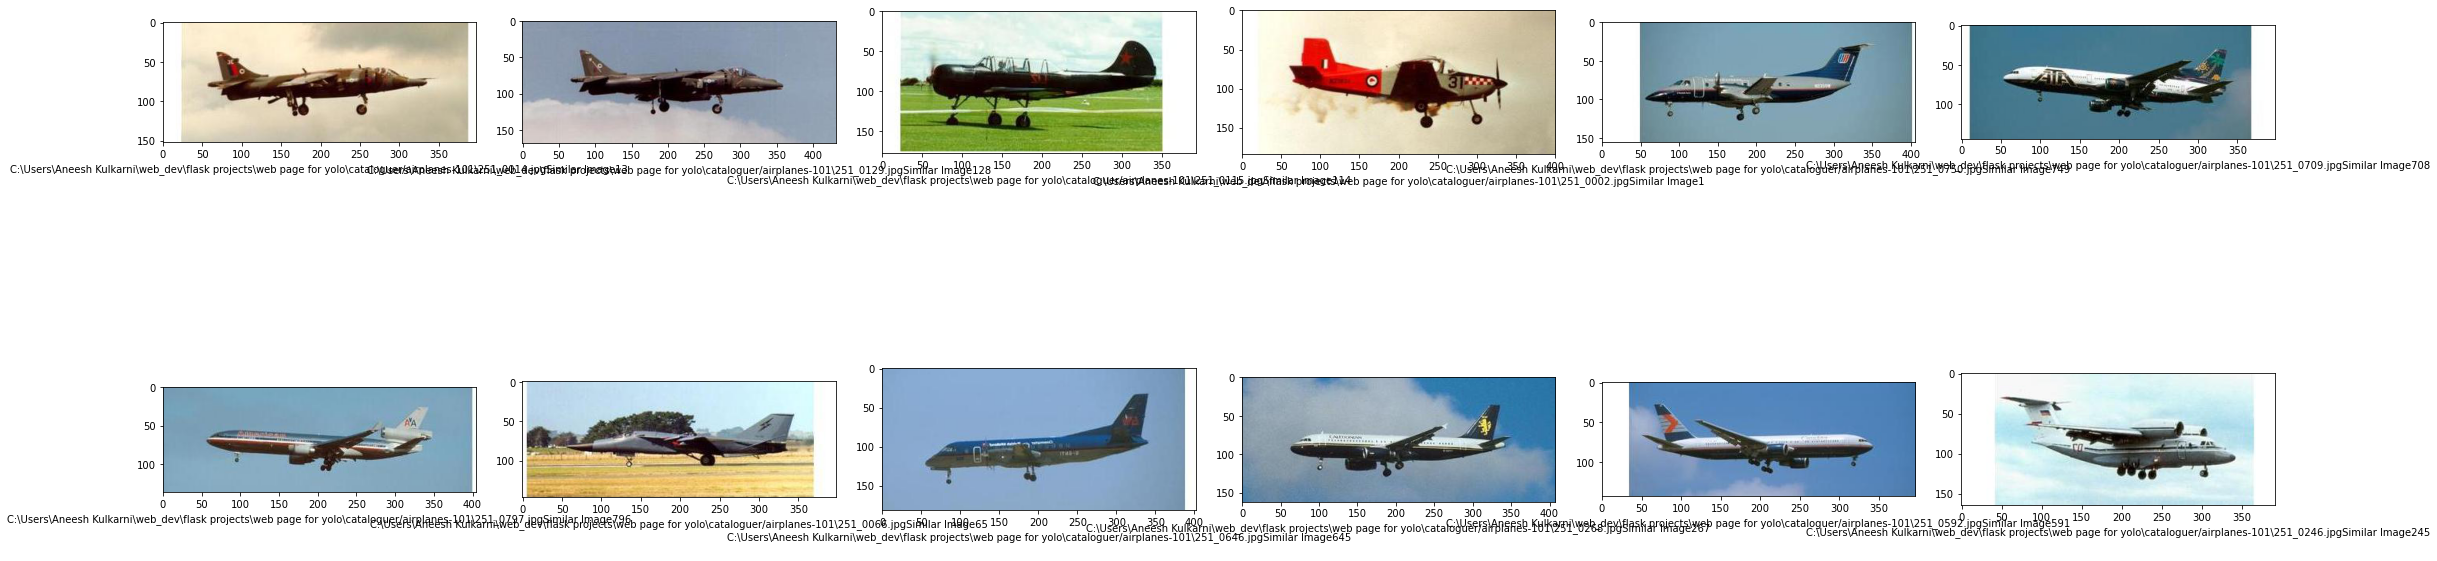

In [37]:
tags=reverse_image_search()

In [33]:
print(tags)

{'aeroplane'}


In [2]:
import numpy as np
file=open('feature_list.csv')
feature_list=np.loadtxt(file,delimiter=',')
print(feature_list)
file.close()

[[ 0.61710203  0.79915404 12.44209099 ...  6.52858925  1.5670135
   2.58933115]
 [ 5.89011478  4.17368364  0.04178393 ... 10.69089127 11.090909
   0.        ]
 [ 3.48021746  9.65766621  2.87039137 ...  2.87504673  2.21518469
   1.11474526]
 ...
 [ 2.73259425  2.26922727  2.22056341 ... 11.33290195  2.15340686
   3.07262039]
 [ 1.90727746  6.81751299  0.79863489 ...  0.02770156  1.85016608
   4.37789106]
 [ 0.          4.69378138  0.6733532  ...  3.90301371  0.
   1.95249653]]


In [14]:
import pickle as pkl

# storing numpy feature_list as a pickle file
filename = 'feature_list.pkl'
fileObject = open(filename, 'wb')

pkl.dump(feature_list, fileObject)
fileObject.close()

In [11]:
fileObject2 = open(filename, 'rb')
modelInput = pkl.load(fileObject2)
fileObject2.close()

EOFError: Ran out of input

In [15]:
with open('feature_list.pkl', 'rb') as f:
    feature_list = pkl.load(f)

In [16]:
print(data)

[[ 0.61710203  0.79915404 12.44209099 ...  6.52858925  1.5670135
   2.58933115]
 [ 5.89011478  4.17368364  0.04178393 ... 10.69089127 11.090909
   0.        ]
 [ 3.48021746  9.65766621  2.87039137 ...  2.87504673  2.21518469
   1.11474526]
 ...
 [ 2.73259425  2.26922727  2.22056341 ... 11.33290195  2.15340686
   3.07262039]
 [ 1.90727746  6.81751299  0.79863489 ...  0.02770156  1.85016608
   4.37789106]
 [ 0.          4.69378138  0.6733532  ...  3.90301371  0.
   1.95249653]]
